# Web Scraping

### 1) Import Libraries

In [2]:
import urllib3
import os
import requests
import re
from bs4 import BeautifulSoup as bs
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

### 2) Retrive Top 1000 Movie Title Links from IMBD

In [2]:
# Craeting a numpy array to navigate the page links
pages = np.arange(1, 1001, 50)
pages

array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601,
       651, 701, 751, 801, 851, 901, 951])

In [3]:
warnings.filterwarnings("ignore", message="Unverified HTTPS request is being made to host 'www.imdb.com'") # ignore warnings 

# Storing each of the urls of 1000 movies 
top_1000_links=[]
for page in pages:
    # Getting the contents from the each url
    page = requests.get('https://www.imdb.com/search/title/?groups=top_1000&start=' + str(page) + '&ref_=adv_nxt', verify=False)
    soup = bs(page.text, 'html.parser')
    links=[]
    for a in soup.find_all('a'): #, href=True):
        links.append(a.get('href'))
    links=['https://www.imdb.com'+a.strip() for a in links if a is not None and a.startswith('/title/tt') and a.endswith('/')]

    #top_1000_links=[]
    for c in links:
        if c not in top_1000_links:
            top_1000_links.append(c)

In [4]:
print(len(top_1000_links))
top_1000_links[0:5]

1000


['https://www.imdb.com/title/tt1745960/',
 'https://www.imdb.com/title/tt6710474/',
 'https://www.imdb.com/title/tt0093773/',
 'https://www.imdb.com/title/tt1877830/',
 'https://www.imdb.com/title/tt0068646/']

### 3) Retrieve Top 1000 movie details from their respective IMBD pages  

In [6]:


# List to store all the dictionary information
movie_info_list = [] 

# Loop through each of the IMBD page links to retrieve information 
        
for index, x in enumerate(np.arange(0, len(top_1000_links))):
    if index % 10 == 0: 
        print(index) # print index when retrival index reaches a multiple of 10 value
    try:  
    #---------------------------Load html page for 1st movie in top 1000 movies

        url=top_1000_links[x]
        req = requests.get(url, timeout =10, verify=False)
        page = req.text
        soup = bs(page, 'html.parser')
    except requests.exceptions.Timeout:
        print(url)
        print("Timeout occurred")

        
    #...Create a list to store the initial information
    Movie_Name = []
    Release_Year = []
    IMDB_Rating = []
    Rating = []
    Genre = []
    Votes = []
    
    #---------------------------Retrieve Movie title from html page
    movie_title_tags=soup.find_all('div',{'class':'sc-80d4314-1 fbQftq'})
    for tag in movie_title_tags:
        title = tag.find('h1').text
        Movie_Name.append(title)
        
    #---------------------------Retrieve release year from html page
    Release_Year_tags=soup.find_all('ul',{'class':'ipc-inline-list ipc-inline-list--show-dividers sc-8c396aa2-0 kqWovI baseAlt'})
    for tag in Release_Year_tags:
        year = tag.find('a').text
        Release_Year.append(year)
    
    #---------------------------Retrieve IMDB Rating from html page
    IMDB_Rating_tags=soup.find_all('div',{'class':'sc-7ab21ed2-0 fAePGh'})
    for tag in IMDB_Rating_tags:
        rating = tag.find('span').text
    IMDB_Rating.append(rating)
        
    #---------------------------Retrieve Rating from html page
    try:
        Rating_tags=soup.find_all('a',{'class':'ipc-link ipc-link--baseAlt ipc-link--inherit-color sc-8c396aa2-1 WIUyh'})[1].text
        Rating.append(Rating_tags)
    except Exception as e:
        None
   
    #---------------------------Retrieve Genre from html page
    Genre_tags=soup.find_all('div',{'class':'ipc-chip-list--baseAlt ipc-chip-list sc-16ede01-4 bMBIRz'})
    for tag in Genre_tags:
        gen = tag.find('span').text
        Genre.append(gen)    
        
    #---------------------------Retrieve votes from html page
    Votes_tags = soup.find_all('div',{'class':'sc-7ab21ed2-3 dPVcnq'})[0].text
    Votes.append(Votes_tags)
    
    # Create our first dictionary to store the inital information
    movie_info={
                'Movie_Name' : Movie_Name,
                'Release_Year' : Release_Year,
                'IMDB_Rating' : IMDB_Rating,
                'Rating' : Rating,
                'Genre' : Genre,
                'Votes' : Votes,
               }
    
    # Retrive the movie cast, director and writer details
    
    def get_content_value(value_data):
        return [text for text in value_data.stripped_strings]

    movie_cast = {}
    labels = soup.select('div.fjLeDR li')

    for label in labels:
        try:
            label_key = label.find(class_ ='ipc-metadata-list-item__label').get_text(strip=True)
            label_value = get_content_value(label.find(class_ ='ipc-metadata-list-item__content-container'))
            movie_cast[label_key] = label_value
        
        except Exception as e:
            None
    # Retrieve box office details and other information
    
    box_office_numbers = {}
    box_office = soup.select('div.ktSkVi li')

    for label in box_office:
        try:
            label_key = label.find(class_ ='ipc-metadata-list-item__label').get_text(" ", strip=True)
            if label.find(class_ ='ipc-metadata-list-item__list-content-item'):
                label_value = label.find(class_ ='ipc-metadata-list-item__list-content-item').get_text(" ", strip=True)
            elif label.find(class_ ='ipc-metadata-list-item__content-container'):
                label_value = label.find(class_ ='ipc-metadata-list-item__content-container').get_text(" ", strip=True)
            box_office_numbers[label_key] = label_value
        
        except Exception as e:
            None
    
    # Combine the dictionaries and append to a list
    movie_dict = movie_info|movie_cast|box_office_numbers
    movie_info_list.append(movie_dict)
    

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [7]:
len(movie_info_list)

1000

In [8]:
movie_info_list[0]

{'Movie_Name': ['Top Gun: Maverick'],
 'Release_Year': ['2022'],
 'IMDB_Rating': ['8.6'],
 'Rating': ['P13'],
 'Genre': ['Action'],
 'Votes': ['269K'],
 'Director': ['Joseph Kosinski'],
 'Writers': ['Jim Cash',
  '(based on characters created by)',
  'Jack Epps Jr.',
  '(based on characters created by)',
  'Peter Craig',
  '(story by)'],
 'Stars': ['Tom Cruise', 'Jennifer Connelly', 'Miles Teller'],
 'Release date': 'May 26, 2022 (Malaysia)',
 'Country of origin': 'United States',
 'Official sites': 'Official Facebook',
 'Language': 'English',
 'Also known as': 'Phi Công Siêu Đẳng Maverick',
 'Filming locations': 'South Lake Tahoe, California, USA',
 'Production companies': 'Paramount Pictures',
 'See more company credits at IMDbPro': 'Paramount Pictures',
 'Budget': '$170,000,000 (estimated)',
 'Gross US & Canada': '$673,724,507',
 'Opening weekend US & Canada': '$126,707,459',
 'Gross worldwide': '$1,377,924,507',
 'Runtime': '2 hours 10 minutes',
 'Color': 'Color',
 'Sound mix': 'Do

### 4) Covert dictionary into a Pandas dataframe

In [63]:
# Select the columns we need

column_list=['Movie_Name','Release_Year','IMDB_Rating','Rating','Genre','Votes','Director','Directors','Writer','Writers',
             'Stars','Release date','Country of origin','Countries of origin','Language','Languages','Production company',
             'Production companies','Budget','Gross worldwide','Runtime']

In [64]:
df = pd.DataFrame(movie_info_list,columns=column_list)

In [65]:
df.head()

,Movie_Name,Release_Year,IMDB_Rating,Rating,Genre,Votes,Director,Directors,Writer,Writers,...,Release date,Country of origin,Countries of origin,Language,Languages,Production company,Production companies,Budget,Gross worldwide,Runtime
0,[Top Gun: Maverick],[2022],[8.6],[P13],[Action],[269K],[Joseph Kosinski],NaN,NaN,"[Jim Cash, (based on characters created by), J...",...,"May 26, 2022 (Malaysia)",United States,NaN,English,NaN,NaN,Paramount Pictures,"$170,000,000 (estimated)","$1,377,924,507",2 hours 10 minutes
1,[Everything Everywhere All at Once],[2022],[8.2],[P13],[Action],[178K],NaN,"[Dan Kwan, Daniel Scheinert]",NaN,"[Dan Kwan, Daniel Scheinert]",...,"March 24, 2022 (Malaysia)",United States,NaN,NaN,English,NaN,A24,"$25,000,000 (estimated)","$97,267,284",2 hours 19 minutes
2,[Predator],[1987],[7.8],[18SG],[Action],[412K],[John McTiernan],NaN,NaN,"[Jim Thomas, John Thomas]",...,"June 12, 1987 (United States)",NaN,United States,NaN,English,NaN,Twentieth Century Fox,"$15,000,000 (estimated)","$98,268,458",1 hour 47 minutes
3,[The Batman],[2022],[7.9],[P13],[Action],[570K],[Matt Reeves],NaN,NaN,"[Matt Reeves, Peter Craig, Bob Kane, (created ...",...,"March 3, 2022 (Malaysia)",United States,NaN,NaN,English,NaN,Warner Bros.,"$200,000,000 (estimated)","$770,836,163",2 hours 56 minutes
4,[The Godfather],[1972],[9.2],[R],[Crime],[1.8M],[Francis Ford Coppola],NaN,NaN,"[Mario Puzo, (screenplay by), Francis Ford Cop...",...,"March 24, 1972 (United States)",United States,NaN,NaN,English,NaN,Paramount Pictures,"$6,000,000 (estimated)","$250,341,816",2 hours 55 minutes


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Movie_Name            1000 non-null   object
 1   Release_Year          1000 non-null   object
 2   IMDB_Rating           1000 non-null   object
 3   Rating                1000 non-null   object
 4   Genre                 1000 non-null   object
 5   Votes                 1000 non-null   object
 6   Director              923 non-null    object
 7   Directors             77 non-null     object
 8   Writer                253 non-null    object
 9   Writers               747 non-null    object
 10  Stars                 1000 non-null   object
 11  Release date          1000 non-null   object
 12  Country of origin     652 non-null    object
 13  Countries of origin   348 non-null    object
 14  Language              456 non-null    object
 15  Languages             544 non-null    o

# Exploratory Data Analysis

### 1) Data Cleaning

#### Tasks
- Clean brackets from columns
- Clean and format release date & release year column
- Clean and format budged & gross worldwide column
- Clean & format runtime column
- Clean & format votes column
- Merge the 2 language & country of origins columns to fill nan values
- Convert IMDB rating column to float data type
- Drop redundant columns

####  Strip brackets from columns and only keep first name for director, writer & stars columns

In [67]:
df['Movie_Name'] = df['Movie_Name'].str.get(0)
df['Release_Year'] = df['Release_Year'].str.get(0)
df['IMDB_Rating'] = df['IMDB_Rating'].str.get(0)
df['Rating'] = df['Rating'].str.get(0)
df['Genre'] = df['Genre'].str.get(0)
df['Votes'] = df['Votes'].str.get(0)
df['Director'] = df['Director'].str.get(0)
df['Directors'] = df['Directors'].str.get(0)
df['Writer'] = df['Writer'].str.get(0)
df['Writers'] = df['Writers'].str.get(0)
df['Stars'] = df['Stars'].str.get(0)

#### Clean and format release date & release year column

In [68]:
df[['Release date','country']] = df['Release date'].str.split('(', n=0, expand=True)
df.drop(['country'],axis=1,inplace=True)
df['Release date'] = pd.to_datetime(df['Release date'])

In [69]:
df['Release_Year'] = df['Release_Year'].astype('int')

#### Clean and format budged & gross worldwide column

Dataset contains the various different currencies which we will need to convert all to US$

In [70]:
# Covert both columns to string type first

df['Budget'] = df['Budget'].astype('str')
df['Gross worldwide'] = df['Gross worldwide'].astype('str')

In [71]:
# Using regex to create functions to convert our money data into USD currency with a float data type  

currency = r"\$|£|¥|FRF|€|RUR|DEM|₹|MVR|₩|ITL|ESP|SEK|DKK|TRL"
number = r"\d+(,\d{3})*\.*\d*"

value_re = rf"({currency})\s?({number})"

def word_to_value(word):
    currency_dict = {"$": 1, "£": 1.21, "¥": 0.0075,'FRF':0.156466,'€':1.02,'RUR':0.016,'DEM':0.52254268,'₹':0.013,'MVR':0.065,
                     '₩':0.00076,'ITL':0.000530066,'ESP':0.0061250877,'SEK':0.097,'DKK':0.14,'TRL':0.056}
    return currency_dict[word]

def parse_word_syntax(string):
    value_string = re.search(number, string).group()
    value = float(value_string.replace(",", ""))
    word = re.search(currency, string).group()
    word_value = word_to_value(word)
    return value*word_value

def money_conversion(money):
    if money == 'nan':
        return None
    else:    
        word_syntax = re.search(value_re, money)
        return parse_word_syntax(word_syntax.group())

# Apply the money_conversion function to our dataframe
df['Budget($)'] = df['Budget'].apply(money_conversion)
df['Gross worldwide($)'] = df['Gross worldwide'].apply(money_conversion)

#### Clean & format runtime column

In [72]:
# Using regex to create a function to convert runtime from hours & minutes(string) to minutes only with a float data type

hour_re = r"([\d]+) *h"
minute_re = r"([\d]+) *m"
number_re = r"([\d]+)"


def runtime_conversions(runtime):
    if re.search(hour_re, runtime) and re.search(minute_re, runtime):
        hour_value = re.search(hour_re, runtime).group()
        hour_value2 = float(re.search(number_re, hour_value).group())
        minute_value = re.search(minute_re, runtime).group()
        minute_value2 = float(re.search(number_re, minute_value).group())
    elif re.search(hour_re, runtime):
        hour_value = re.search(hour_re, runtime).group()
        hour_value2 = float(re.search(number_re, hour_value).group())
        minute_value2 = 0
    elif re.search(minute_re, runtime):
        minute_value = re.search(minute_re, runtime).group()
        minute_value2 = float(re.search(number_re, minute_value).group())
        hour_value2 = 0
    return (hour_value2*60)+minute_value2

# Apply the runtime_conversion function to our dataframe
df['Runtime(min)'] = df['Runtime'].apply(runtime_conversions)


#### Clean & format votes column

In [73]:
# Function to convert Votes column values from string with characters to numeric float type

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

df['Votes'] = df['Votes'].apply(value_to_float)

#### Merge the two language, country of origins, writer, director & production company columns to fill empty cell values

In [74]:
df.loc[df["Country of origin"].isnull(),'Country of origin'] = df["Countries of origin"]
df.loc[df["Language"].isnull(),'Language'] = df["Languages"]
df.loc[df["Director"].isnull(),'Director'] = df["Directors"]
df.loc[df["Production company"].isnull(),'Production company'] = df["Production companies"]
df.loc[df["Writer"].isnull(),'Writer'] = df["Writers"]

#### Convert IMDB rating column to float data type

In [75]:
df['IMDB_Rating'] = df['IMDB_Rating'].astype('float')

#### Drop redundant columns

In [76]:
df.drop(['Countries of origin'],axis=1,inplace=True)
df.drop(['Languages'],axis=1,inplace=True)
df.drop(['Runtime'],axis=1,inplace=True)
df.drop(['Gross worldwide'],axis=1,inplace=True)
df.drop(['Budget'],axis=1,inplace=True)
df.drop(['Directors'],axis=1,inplace=True)
df.drop(['Production companies'],axis=1,inplace=True)
df.drop(['Writers'],axis=1,inplace=True)

In [77]:
df.head(15)

,Movie_Name,Release_Year,IMDB_Rating,Rating,Genre,Votes,Director,Writer,Stars,Release date,Country of origin,Language,Production company,Budget($),Gross worldwide($),Runtime(min)
0,Top Gun: Maverick,2022,8.6,P13,Action,269000.0,Joseph Kosinski,Jim Cash,Tom Cruise,2022-05-26,United States,English,Paramount Pictures,170000000.0,1.377925e+09,130.0
1,Everything Everywhere All at Once,2022,8.2,P13,Action,178000.0,Dan Kwan,Dan Kwan,Michelle Yeoh,2022-03-24,United States,English,A24,25000000.0,9.726728e+07,139.0
2,Predator,1987,7.8,18SG,Action,412000.0,John McTiernan,Jim Thomas,Arnold Schwarzenegger,1987-06-12,United States,English,Twentieth Century Fox,15000000.0,9.826846e+07,107.0
3,The Batman,2022,7.9,P13,Action,570000.0,Matt Reeves,Matt Reeves,Robert Pattinson,2022-03-03,United States,English,Warner Bros.,200000000.0,7.708362e+08,176.0
4,The Godfather,1972,9.2,R,Crime,1800000.0,Francis Ford Coppola,Mario Puzo,Marlon Brando,1972-03-24,United States,English,Paramount Pictures,6000000.0,2.503418e+08,175.0
5,Spider-Man: No Way Home,2021,8.3,P13,Action,704000.0,Jon Watts,Chris McKenna,Tom Holland,2021-12-16,United States,English,Columbia Pictures,200000000.0,1.901233e+09,148.0
6,The Shawshank Redemption,1994,9.3,(Banned),Drama,2600000.0,Frank Darabont,Stephen King,Tim Robbins,1994-10-14,United States,English,Castle Rock Entertainment,25000000.0,2.888450e+07,142.0
7,Once Upon a Time in... Hollywood,2019,7.6,18,Comedy,711000.0,Quentin Tarantino,Quentin Tarantino,Leonardo DiCaprio,2019-07-26,United States,English,Columbia Pictures,90000000.0,3.745658e+08,161.0
8,RRR (Rise Roar Revolt),2022,8.0,Not Rated,Action,95000.0,S.S. Rajamouli,Vijayendra Prasad,N.T. Rama Rao Jr.,2022-03-25,India,Telugu,DVV Entertainment,45500000.0,9.991081e+07,187.0
9,Forrest Gump,1994,8.8,P13,Drama,2000000.0,Robert Zemeckis,Winston Groom,Tom Hanks,1994-07-06,United States,English,Paramount Pictures,55000000.0,6.782265e+08,142.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Movie_Name          1000 non-null   object        
 1   Release_Year        1000 non-null   int32         
 2   IMDB_Rating         1000 non-null   float64       
 3   Rating              986 non-null    object        
 4   Genre               958 non-null    object        
 5   Votes               1000 non-null   float64       
 6   Director            1000 non-null   object        
 7   Writer              1000 non-null   object        
 8   Stars               1000 non-null   object        
 9   Release date        1000 non-null   datetime64[ns]
 10  Country of origin   1000 non-null   object        
 11  Language            1000 non-null   object        
 12  Production company  1000 non-null   object        
 13  Budget($)           800 non-null    float64      

### 2) Save Cleaned Data as CSV file

In [79]:
df.to_csv("IMBD_Top_1000_Movies_Final.csv")

In [6]:
df = pd.read_csv('IMBD_Top_1000_Movies_Final.csv',index_col=0)

In [7]:
df.head()

,Movie_Name,Release_Year,IMDB_Rating,Rating,Genre,Votes,Director,Writer,Stars,Release date,Country of origin,Language,Production company,Budget($),Gross worldwide($),Runtime(min)
0,Top Gun: Maverick,2022,8.6,P13,Action,269000.0,Joseph Kosinski,Jim Cash,Tom Cruise,2022-05-26,United States,English,Paramount Pictures,170000000.0,1.377925e+09,130.0
1,Everything Everywhere All at Once,2022,8.2,P13,Action,178000.0,Dan Kwan,Dan Kwan,Michelle Yeoh,2022-03-24,United States,English,A24,25000000.0,9.726728e+07,139.0
2,Predator,1987,7.8,18SG,Action,412000.0,John McTiernan,Jim Thomas,Arnold Schwarzenegger,1987-06-12,United States,English,Twentieth Century Fox,15000000.0,9.826846e+07,107.0
3,The Batman,2022,7.9,P13,Action,570000.0,Matt Reeves,Matt Reeves,Robert Pattinson,2022-03-03,United States,English,Warner Bros.,200000000.0,7.708362e+08,176.0
4,The Godfather,1972,9.2,R,Crime,1800000.0,Francis Ford Coppola,Mario Puzo,Marlon Brando,1972-03-24,United States,English,Paramount Pictures,6000000.0,2.503418e+08,175.0


### 3) Analysis

In [80]:
df.describe()

,Release_Year,IMDB_Rating,Votes,Budget($),Gross worldwide($),Runtime(min)
count,1000.000000,1000.000000,1.000000e+03,8.000000e+02,9.320000e+02,1000.00000
mean,1991.232000,7.964600,3.032700e+05,3.201422e+07,1.469435e+08,123.74000
std,23.967574,0.277604,3.636179e+05,5.145124e+07,2.927900e+08,28.63862
min,1920.000000,7.600000,2.500000e+04,1.300000e+00,6.300000e+01,45.00000
25%,1975.000000,7.700000,5.975000e+04,3.000000e+06,2.547220e+06,103.00000
50%,1999.000000,7.900000,1.530000e+05,1.200000e+07,3.104718e+07,120.00000
75%,2010.000000,8.100000,4.182500e+05,3.262500e+07,1.351300e+08,138.00000
max,2022.000000,9.300000,2.600000e+06,3.560000e+08,2.847397e+09,321.00000


#### a) Checking for duplicated movies entries

In [32]:
df[df[['Movie_Name','Release_Year']].duplicated() == True]

,Movie_Name,Release_Year,IMDB_Rating,Rating,Genre,Votes,Director,Writer,Stars,Release date,Country of origin,Language,Production company,Budget($),Gross worldwide($),Runtime(min)


- The dataframe has no duplicated movie entries

#### b) Checking for outliers for the Gross Earnings column values

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

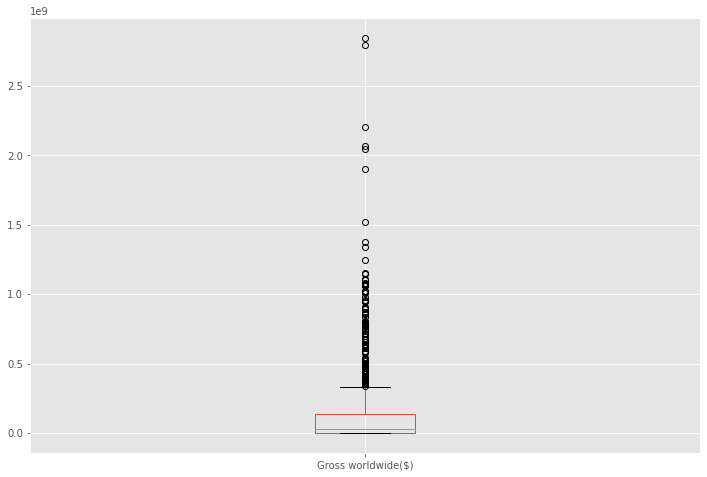

In [14]:
df.boxplot(column=['Gross worldwide($)']);

- We have a few movies that are in the 2-3 billion range but we will include them for further analysis

#### c) Lets's see what are the top 10 highest grossing movies

In [11]:
df[['Movie_Name','Gross worldwide($)']].sort_values(by=['Gross worldwide($)'], inplace=False, ascending=False,ignore_index=True).head(10)

,Movie_Name,Gross worldwide($)
0,Avatar,2.847397e+09
1,Avengers: Endgame,2.797501e+09
2,Titanic,2.201647e+09
3,Star Wars: Episode VII - The Force Awakens,2.069522e+09
4,Avengers: Infinity War,2.048360e+09
5,Spider-Man: No Way Home,1.901233e+09
6,The Avengers,1.518816e+09
7,Top Gun: Maverick,1.377925e+09
8,Harry Potter and the Deathly Hallows: Part 2,1.342360e+09
9,Incredibles 2,1.243089e+09


#### d) Lets's see what are the top 10 highest rated movies

In [10]:
df[['Movie_Name','IMDB_Rating']].sort_values(by=['IMDB_Rating'], inplace=False, ascending=False,ignore_index=True).head(10)

,Movie_Name,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Godfather Part II,9.0
3,12 Angry Men,9.0
4,Schindler's List,9.0
5,The Lord of the Rings: The Return of the King,9.0
6,The Dark Knight,9.0
7,Rocketry: The Nambi Effect,9.0
8,Pulp Fiction,8.9
9,Jai Bhim,8.9


### e) Correlation Analysis

#### Is the gross profit of movies correlated to the budget spend?

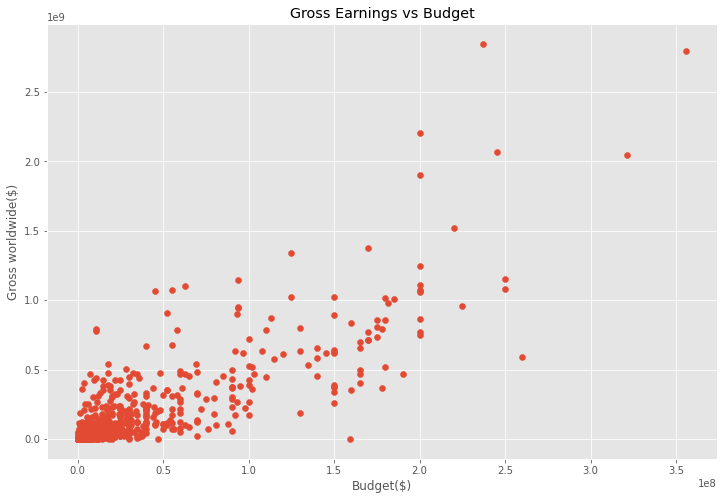

In [20]:
# Scatter plot of Gross Earnings vs Budget

plt.scatter(x=df['Budget($)'],y=df['Gross worldwide($)'])
plt.title('Gross Earnings vs Budget')
plt.xlabel('Budget($)')
plt.ylabel('Gross worldwide($)');

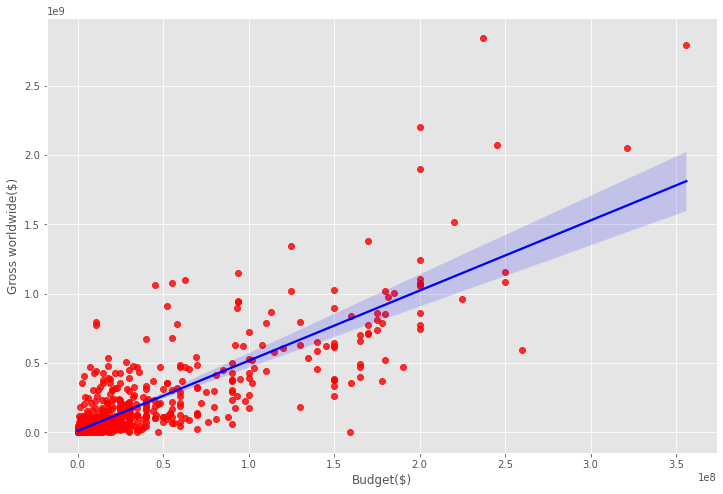

In [24]:
# Regression plot of Gross Earnings vs Budget

sns.regplot(x="Budget($)", y="Gross worldwide($)", data=df, scatter_kws={'color':'red'},line_kws={'color':'blue'});

- Data shows a positive correlation for Gross Earnings vs Budget, subsequently we can find out by how much

In [26]:
df.corr(method='pearson')

,Release_Year,IMDB_Rating,Votes,Budget($),Gross worldwide($),Runtime(min)
Release_Year,1.000000,-0.085362,0.248244,0.408866,0.285205,0.198085
IMDB_Rating,-0.085362,1.000000,0.487274,0.019338,0.116925,0.265076
Votes,0.248244,0.487274,1.000000,0.481079,0.564949,0.162524
Budget($),0.408866,0.019338,0.481079,1.000000,0.824257,0.216407
Gross worldwide($),0.285205,0.116925,0.564949,0.824257,1.000000,0.158258
Runtime(min),0.198085,0.265076,0.162524,0.216407,0.158258,1.000000


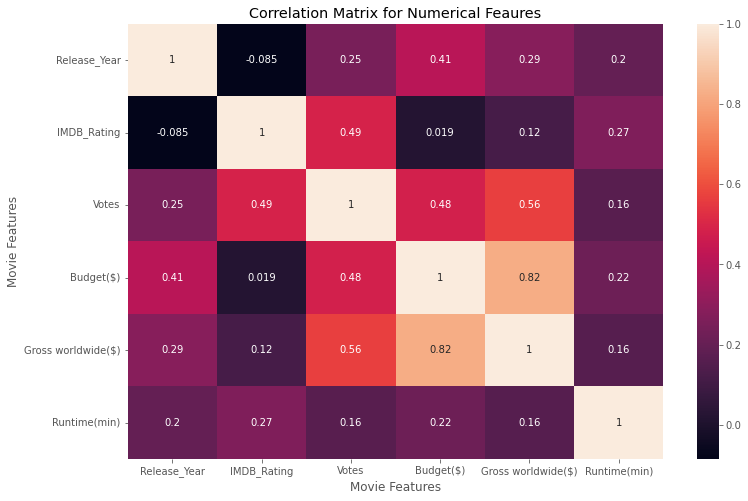

In [28]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numerical Feaures')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features');

- We can see the Budged and No. of Votes are highly correlated to the Gross Earnings of a movie
- Using the pearson method the Budget and Gross Earnings shows a correlation of 0.82

#### Are there any other correlation relationships present?

In [43]:
df_numerized = df.copy()

In [45]:
# Drop null values

df_numerized = df_numerized.dropna()

In [46]:
df_numerized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 0 to 996
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie_Name          723 non-null    object 
 1   Release_Year        723 non-null    int64  
 2   IMDB_Rating         723 non-null    float64
 3   Rating              723 non-null    object 
 4   Genre               723 non-null    object 
 5   Votes               723 non-null    float64
 6   Director            723 non-null    object 
 7   Writer              723 non-null    object 
 8   Stars               723 non-null    object 
 9   Release date        723 non-null    object 
 10  Country of origin   723 non-null    object 
 11  Language            723 non-null    object 
 12  Production company  723 non-null    object 
 13  Budget($)           723 non-null    float64
 14  Gross worldwide($)  723 non-null    float64
 15  Runtime(min)        723 non-null    float64
dtypes: float

In [49]:
# Covert to random numeric value for each unique categorical value

for col_names in df_numerized.columns:
    if df_numerized[col_names].dtypes == 'object':
        df_numerized[col_names] = df_numerized[col_names].astype('category')
        df_numerized[col_names] = df_numerized[col_names].cat.codes
    
df_numerized.head(15)

,Movie_Name,Release_Year,IMDB_Rating,Rating,Genre,Votes,Director,Writer,Stars,Release date,Country of origin,Language,Production company,Budget($),Gross worldwide($),Runtime(min)
0,664,2022,8.6,11,0,269000.0,197,263,441,683,34,7,235,170000000.0,1.377925e+09,130.0
1,188,2022,8.2,11,0,178000.0,70,112,330,680,34,7,3,25000000.0,9.726728e+07,139.0
2,428,1987,7.8,3,0,412000.0,185,267,29,211,34,7,315,15000000.0,9.826846e+07,107.0
3,526,2022,7.9,11,0,570000.0,239,362,382,679,34,7,332,200000000.0,7.708362e+08,176.0
4,564,1972,9.2,15,5,1800000.0,105,347,309,116,34,7,235,6000000.0,2.503418e+08,175.0
5,495,2021,8.3,11,0,704000.0,191,86,445,678,34,7,86,200000000.0,1.901233e+09,148.0
6,632,1994,9.3,0,6,2600000.0,107,498,436,279,34,7,68,25000000.0,2.888450e+07,142.0
7,410,2019,7.6,1,4,711000.0,298,424,285,662,34,7,86,90000000.0,3.745658e+08,161.0
8,437,2022,8.0,10,0,95000.0,333,544,341,681,13,29,93,45500000.0,9.991081e+07,187.0
9,203,1994,8.8,11,6,2000000.0,323,563,443,275,34,7,235,55000000.0,6.782265e+08,142.0


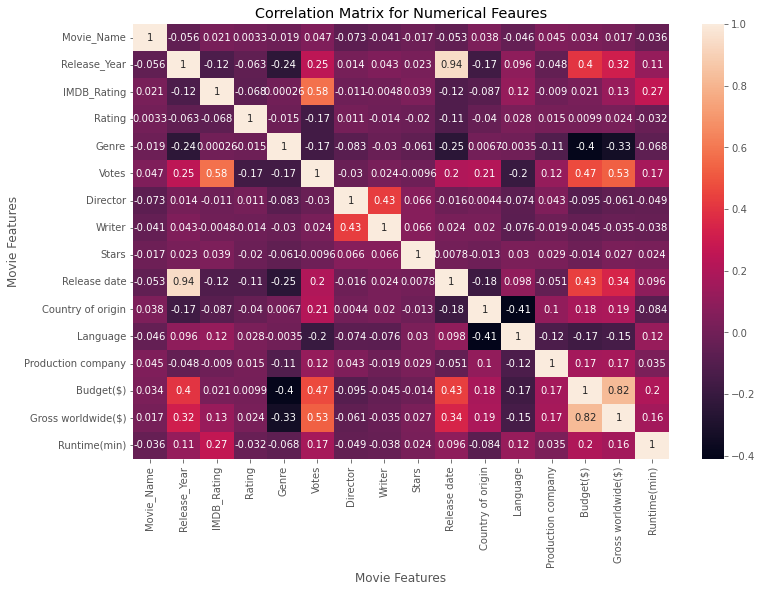

In [50]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numerical Feaures')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features');

In [70]:
correlation_mat = df_numerized.corr(method='pearson')
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs > 0.5)]
high_corr

Votes               Gross worldwide($)    0.528775
Gross worldwide($)  Votes                 0.528775
IMDB_Rating         Votes                 0.577996
Votes               IMDB_Rating           0.577996
Budget($)           Gross worldwide($)    0.822687
Gross worldwide($)  Budget($)             0.822687
Release date        Release_Year          0.943060
Release_Year        Release date          0.943060
Movie_Name          Movie_Name            1.000000
Budget($)           Budget($)             1.000000
Production company  Production company    1.000000
Language            Language              1.000000
Country of origin   Country of origin     1.000000
Release date        Release date          1.000000
Stars               Stars                 1.000000
Writer              Writer                1.000000
Director            Director              1.000000
Votes               Votes                 1.000000
Genre               Genre                 1.000000
Rating              Rating     

- We can also see that IMDB Rating is also correlated to the No. of Votes 

### f) What are the top 15 production companies by gross earnings

In [75]:
CompanyGrossSum = df.groupby('Production company')[["Gross worldwide($)"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('Gross worldwide($)', ascending = False)[:15].astype('int64') 

CompanyGrossSumSorted

,Gross worldwide($)
Production company,
Warner Bros.,18488752407
Twentieth Century Fox,12705713363
Marvel Studios,9155120291
Walt Disney Pictures,9025914848
Paramount Pictures,8090072031
Universal Pictures,7908222218
Columbia Pictures,5904501715
Lucasfilm,5782849231
Pixar Animation Studios,5316384531


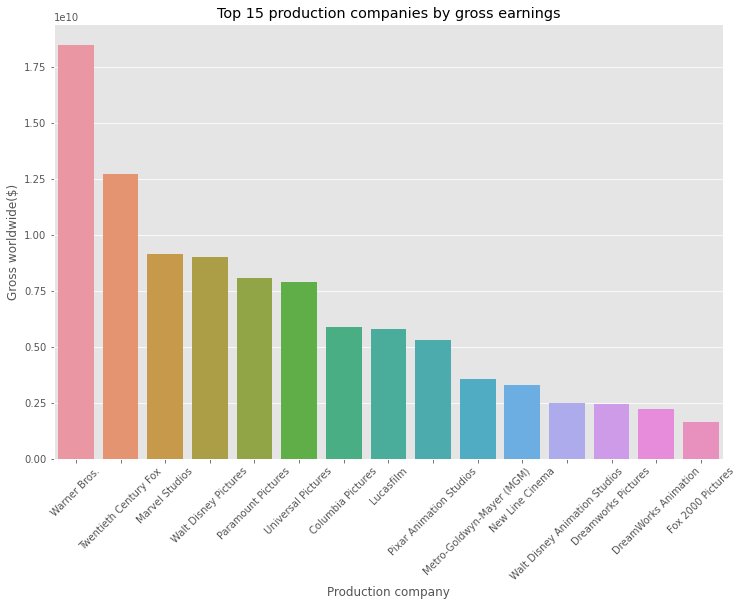

In [98]:
CompanyGrossSumSorted['Production company'] = CompanyGrossSumSorted.index

sns.barplot(x='Production company',y='Gross worldwide($)',data=CompanyGrossSumSorted)
plt.xticks(rotation=45)
plt.title('Top 15 production companies by gross earnings');

### g) What sre the gross earnings of the top 15 production companies  by year

In [74]:
CompanyGrossSumYear = df.groupby(['Production company','Release_Year'])[["Gross worldwide($)"]].sum()

CompanyGrossSumYearSorted = CompanyGrossSum.sort_values(['Gross worldwide($)','Production company','Release_Year'], ascending = False)[:15].astype('int64') 

CompanyGrossSumYearSorted

,,Gross worldwide($)
Production company,Release_Year,
Twentieth Century Fox,2009,2893871520
Marvel Studios,2019,2797501328
Twentieth Century Fox,1997,2201647264
Metro-Goldwyn-Mayer (MGM),2012,2125600150
Lucasfilm,2015,2069521700
Marvel Studios,2018,2048359754
Columbia Pictures,2021,1901232550
Warner Bros.,2010,1813918485
Twentieth Century Fox,2018,1696705920


- Warner Bros had the most gross earnings for all years combined, Twentieth Century Fox had the most earnings by year in 2009

### h) Which Top 15 countries movie industry have the highest gross earnings

In [44]:
CountryGrossSum = df.groupby('Country of origin')[["Gross worldwide($)"]].sum()

CountryGrossSumSorted = CountryGrossSum.sort_values('Gross worldwide($)', ascending = False)[:15].astype('int64') 

CountryGrossSumSorted

,Gross worldwide($)
Country of origin,
United States,104792272414
United Kingdom,14146468529
New Zealand,5109897643
Japan,2446045438
France,2072853613
India,1656658263
Germany,1012312248
Australia,785735148
Hong Kong,687657162


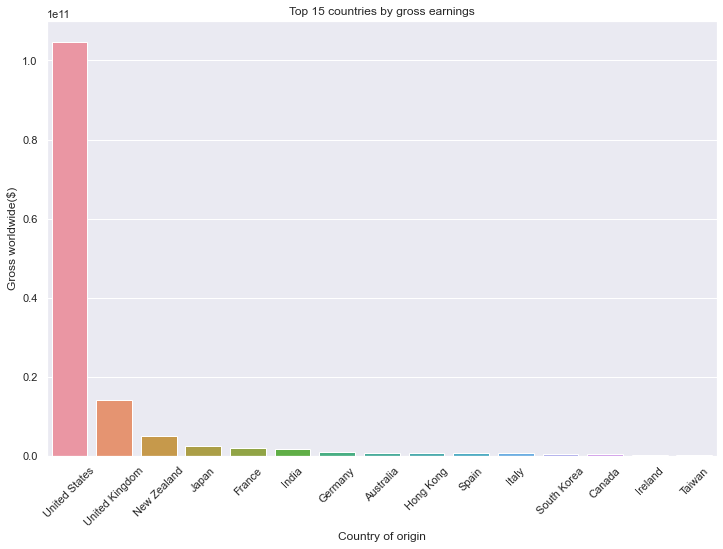

In [54]:
CountryGrossSumSorted['Country of origin'] = CountryGrossSumSorted.index

plt.figure(figsize=(12,8))
sns.barplot(x='Country of origin',y='Gross worldwide($)',data=CountryGrossSumSorted)
plt.xticks(rotation=45)
plt.title('Top 15 countries by gross earnings');

### i) What are Top 15 Movie Ratings?

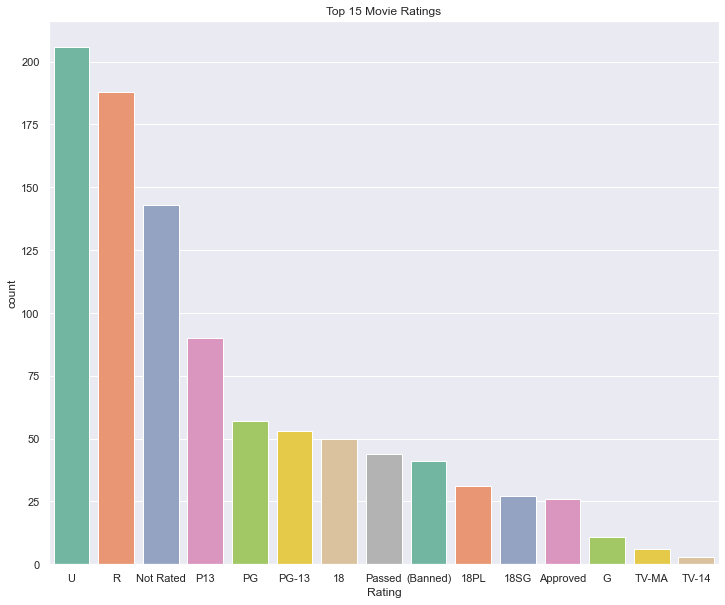

In [16]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="Rating", data=df, palette="Set2", order=df['Rating'].value_counts().index[0:15])
plt.title('Top 15 Movie Ratings');

### j) Which year had the most number of Movie Releases?

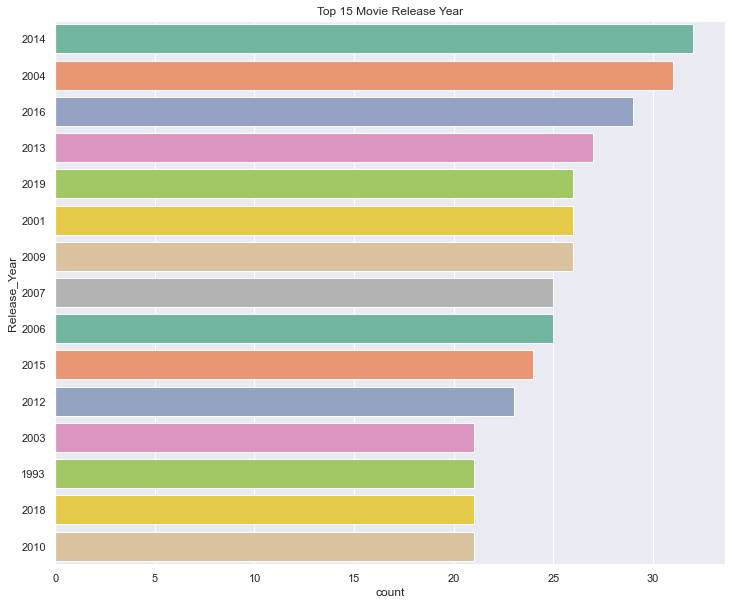

In [17]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="Release_Year", data=df, palette="Set2", order=df['Release_Year'].value_counts().index[0:15])
plt.title('Top 15 Movie Release Year');

- 2014 had the most number of movie releases from our dataset

### k) What is the average duration of a movie?

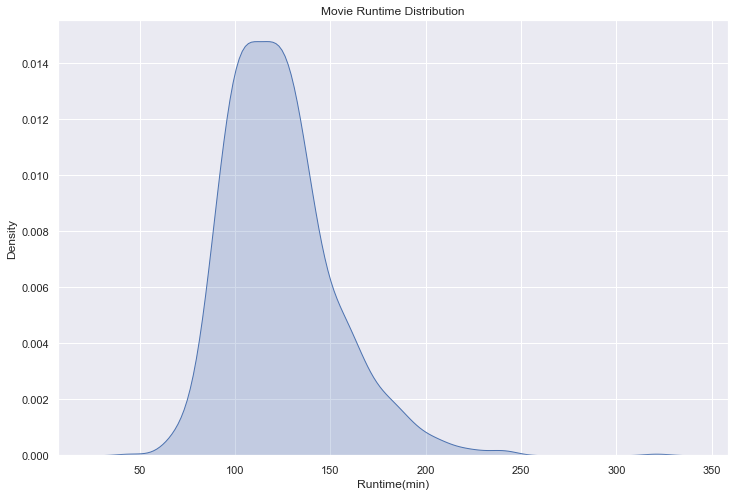

In [20]:
sns.set(style="darkgrid")
sns.kdeplot(data=df['Runtime(min)'], shade=True)
plt.title('Movie Runtime Distribution');

- A movie generally has an average runtime of around 105 - 120 minutes

### l) What are the most popular Genre types?

In [40]:
df2 = df.copy()
df2 = df2.dropna()

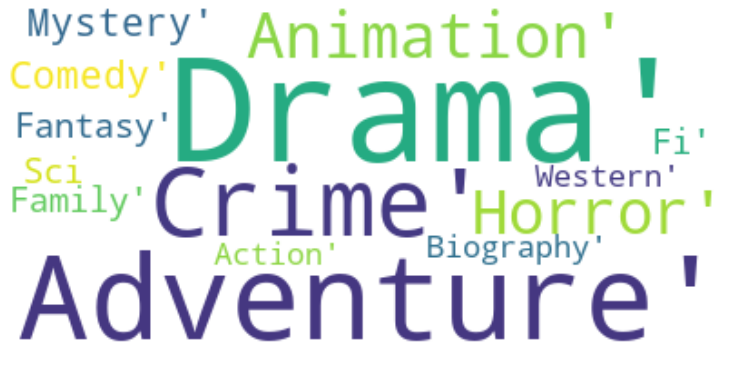

In [61]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(df2['Genre']))
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()